In [1]:
from config_figures import *

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(google_drive_path + '/nmds_pca_data.csv').drop(['system:index', '.geo'], axis=1)
df

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,MDS1,MDS2,MDS3,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm,x,y
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,0.647776,-0.294345,0.109215,1.709484,22.444225,42.883077,-85.5,0.5
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,0.613397,-0.362359,0.128936,1.209468,23.118284,42.494265,-84.5,0.5
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,0.650375,-0.368078,0.069564,1.495468,22.953371,42.309594,-83.5,0.5
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.688352,-0.280964,0.089301,0.661833,23.515853,42.042120,-82.5,0.5
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.597050,-0.399280,0.129519,0.530261,25.933236,41.885098,-81.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,0.056760,-0.164505,0.400103,5.890789,27.957657,81.449219,81.5,-31.5
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,-0.117749,-0.119079,0.269884,3.329121,35.510186,81.519485,82.5,-31.5
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,-0.419090,1.125502,0.401477,8.571797,19.830088,82.192502,83.5,-31.5
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,0.668452,1.380589,1.831384,9.597962,18.879776,82.256771,84.5,-31.5


In [7]:
df_covs = df.drop(['MDS1','MDS2','MDS3','x','y'], axis=1)
df_covs

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,1.709484,22.444225,42.883077
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,1.209468,23.118284,42.494265
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,1.495468,22.953371,42.309594
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.661833,23.515853,42.042120
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.530261,25.933236,41.885098
...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,5.890789,27.957657,81.449219
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,3.329121,35.510186,81.519485
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,8.571797,19.830088,82.192502
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,9.597962,18.879776,82.256771


In [12]:
df_st = StandardScaler().fit_transform(df_covs)
pcamodel = PCA(n_components=2)
pca_df = pd.DataFrame(pcamodel.fit_transform(df_st)).rename(columns = {0:'pc1', 1:'pc2'})
pca_df

,pc1,pc2
0,4.664520,-1.907655
1,4.636016,-1.943608
2,4.635579,-1.975589
3,4.636653,-1.993013
4,4.491295,-2.005297
...,...,...
19530,-1.082003,3.507856
19531,-1.226192,3.219177
19532,-0.881590,3.720287
19533,-0.767211,3.778025


In [13]:
scaled_pca_df = pca_df * (1.0 / (pca_df.max(axis=0) - pca_df.min(axis=0)))
scaled_pca_df

,pc1,pc2
0,0.519329,-0.224109
1,0.516155,-0.228333
2,0.516107,-0.232090
3,0.516226,-0.234137
4,0.500043,-0.235580
...,...,...
19530,-0.120466,0.412099
19531,-0.136519,0.378185
19532,-0.098153,0.437055
19533,-0.085418,0.443838


In [15]:
pca_variance_explained = pd.Series(pcamodel.explained_variance_ratio_, index=['pc1','pc2'])
pca_variance_explained

pc1    0.438662
pc2    0.265299
dtype: float64

In [91]:
pca_loadings = pd.DataFrame(pcamodel.components_.T, index = df_covs.columns, columns=['pc1','pc2'])
pca_loadings['var_name'] = ['annual P', 'P seasonality', 'MAT', 'T seasonality', 'GLS', 'NPP', 'Coarse fragments', 'Silt content', 'Soil pH']
pca_loadings

,pc1,pc2,var_name
CHELSA_bio12_1981_2010_V2_1,0.396485,-0.255254,annual P
CHELSA_bio15_1981_2010_V2_1,-0.015762,0.472781,P seasonality
CHELSA_bio1_1981_2010_V2_1,0.389413,0.360790,MAT
CHELSA_bio4_1981_2010_V2_1,-0.437969,-0.244097,T seasonality
CHELSA_gsl_1981_2010_V2_1,0.431547,-0.219677,GLS
CHELSA_npp_1981_2010_V2_1,0.481241,-0.116788,NPP
SG_Coarse_fragments_005cm,-0.094442,0.053298,Coarse fragments
SG_Silt_Content_005cm,-0.215826,-0.453108,Silt content
SG_Soil_pH_H2O_005cm,-0.160516,0.501523,Soil pH


In [123]:
mds

0        0.647776
1        0.613397
2        0.650375
3        0.688352
4        0.597050
           ...   
19530    0.056760
19531   -0.117749
19532   -0.419090
19533    0.668452
19534   -1.524047
Name: MDS1, Length: 19535, dtype: float64

In [121]:
mds = df['MDS1']
q = mds.quantile([0.1, 0.9])
mds.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), -1), 1))

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
19530    0.522254
19531    0.348682
19532    0.048961
19533    1.000000
19534   -1.000000
Name: MDS1, Length: 19535, dtype: float64

In [72]:
df[['MDS1','MDS2','MDS3']].quantile([0.05, 0.1, 0.25, 0.5,0.75, 0.9, 0.95], axis=0)

,MDS1,MDS2,MDS3
0.05,-0.527092,-0.349187,-0.320440
0.10,-0.468315,-0.293990,-0.267335
0.25,-0.335820,-0.164911,-0.163644
0.50,-0.076064,-0.012376,-0.011709
0.75,0.331453,0.191643,0.157485
0.90,0.537088,0.285787,0.292867
0.95,0.625732,0.344659,0.384133


In [137]:
# reproject MDS values from [-0.5,0.5] (~ 10 and 90% quantiles of MDS1) to [0,1] to RGB color
def scale_MDS(MDS):
    q = MDS.quantile([0.1, 0.9])
    return MDS.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), 0), 1))
#[0 if r < 0 else (1 if r > 1 else r) for r in (pca_mds_df[MDS]+0.5)]

pca_mds_df = scaled_pca_df.join(df[['MDS1','MDS2','MDS3']])
pca_mds_df['red'] = scale_MDS(df['MDS1']) 
pca_mds_df['green'] = scale_MDS(df['MDS2']) 
pca_mds_df['blue'] = scale_MDS(df['MDS3']) 
pca_mds_df

,pc1,pc2,MDS1,MDS2,MDS3,red,green,blue
0,0.519329,-0.224109,0.647776,-0.294345,0.109215,1.000000,0.000000,0.672169
1,0.516155,-0.228333,0.613397,-0.362359,0.128936,1.000000,0.000000,0.707371
2,0.516107,-0.232090,0.650375,-0.368078,0.069564,1.000000,0.000000,0.601389
3,0.516226,-0.234137,0.688352,-0.280964,0.089301,1.000000,0.022467,0.636620
4,0.500043,-0.235580,0.597050,-0.399280,0.129519,1.000000,0.000000,0.708413
...,...,...,...,...,...,...,...,...
19530,-0.120466,0.412099,0.056760,-0.164505,0.400103,0.522254,0.223336,1.000000
19531,-0.136519,0.378185,-0.117749,-0.119079,0.269884,0.348682,0.301687,0.958975
19532,-0.098153,0.437055,-0.419090,1.125502,0.401477,0.048961,1.000000,1.000000
19533,-0.085418,0.443838,0.668452,1.380589,1.831384,1.000000,1.000000,1.000000


In [138]:
pca_mds_df['blue'].max()

1.0

In [139]:
C = np.array(pca_mds_df[['red','green','blue']])
C

array([[1.        , 0.        , 0.67216865],
       [1.        , 0.        , 0.70737148],
       [1.        , 0.        , 0.60138891],
       ...,
       [0.04896074, 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        ]])

In [140]:
C.max()

1.0

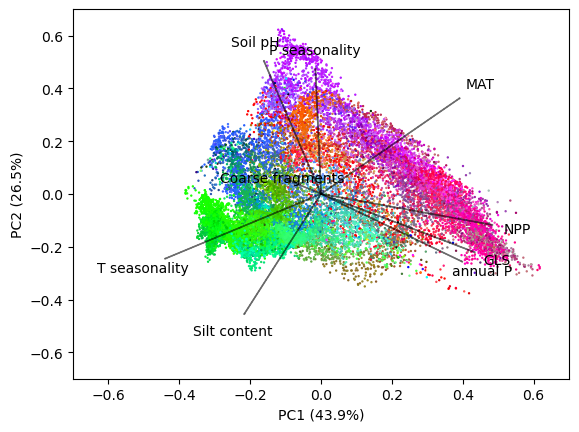

In [142]:
plt.scatter(x=pca_mds_df['pc1'], y=pca_mds_df['pc2'], c=C, s=0.5)
for r in pca_loadings.iterrows():
    plt.arrow(0, 0, r[1]['pc1'], r[1]['pc2'], color = 'k', alpha = 0.5)
    plt.text(r[1]['pc1'] * 1.15, r[1]['pc2'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')
plt.xlabel("PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)")
plt.ylabel("PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)")
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

#plt.show()
plt.savefig('../figures/nmds_pca.png')

In [ ]:
plt.scatter(x=df_merged.pc1, y=df_merged.pc2, c=C, s=3) 
for i in pca_loadings.index:
    plt.arrow(0, 0, pca_loadings.loc[i, 'pc1'], pca_loadings.loc[i, 'pc2'], color = 'c', alpha = 0.5)
    plt.text(pca_loadings.loc[i, 'pc1'] * 1.15, pca_loadings.loc[i, 'pc2'] * 1.15, i, 
             color = 'c', ha = 'center', va = 'center')
plt.xlabel("PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)")
plt.ylabel("PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)")
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)
plt.show()